In [1]:
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

print("Libraries imported.")

Libraries imported.


In [2]:
# --- Load Diabetes Data ---
diabetes_path = os.path.join("..", "data", "raw", "diabetes", "diabetes.csv")
df = pd.read_csv(diabetes_path)

print(f"Diabetes data shape: {df.shape}")
display(df.head())

Diabetes data shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Get a concise summary of the dataframe
print("Dataset Information:")
df.info()

# Get descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Descriptive Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Replace 0s with NaN (Not a Number) in columns where 0 is not a valid value
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_clean] = df[cols_to_clean].replace(0, np.nan)

# Now, let's check how many missing values we have
print("Missing values after cleaning:")
print(df.isnull().sum())

# We will impute these missing values with the median of each column.
# Using the median is more robust to outliers than using the mean.
for col in cols_to_clean:
    df[col].fillna(df[col].median(), inplace=True)
    
print("\nMissing values after imputation:")
print(df.isnull().sum())

Missing values after cleaning:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_2480\158477259.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_2480\158477259.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


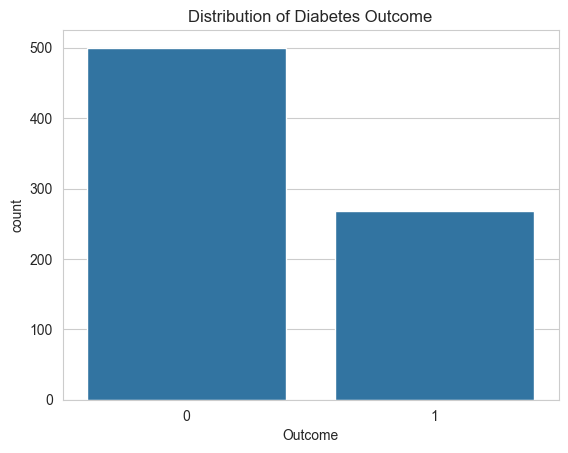

In [5]:
# Our target is the 'Outcome' column (0 = No Diabetes, 1 = Diabetes)
print(df['Outcome'].value_counts(normalize=True))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define Features (X) and Target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data, making sure to stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Data splitting and scaling complete.")

Data splitting and scaling complete.


In [7]:
# Create directories
DIABETES_PROCESSED_DIR = os.path.join("..", "data", "processed", "diabetes")
DIABETES_MODELS_DIR = os.path.join("..", "models", "diabetes")
os.makedirs(DIABETES_PROCESSED_DIR, exist_ok=True)
os.makedirs(DIABETES_MODELS_DIR, exist_ok=True)

# Save data
joblib.dump(X_train, os.path.join(DIABETES_PROCESSED_DIR, "X_train.joblib"))
joblib.dump(X_test, os.path.join(DIABETES_PROCESSED_DIR, "X_test.joblib"))
joblib.dump(y_train, os.path.join(DIABETES_PROCESSED_DIR, "y_train.joblib"))
joblib.dump(y_test, os.path.join(DIABETES_PROCESSED_DIR, "y_test.joblib"))

# Save the scaler
joblib.dump(scaler, os.path.join(DIABETES_MODELS_DIR, "diabetes_scaler.joblib"))

print("Diabetes data artifacts saved successfully!")

Diabetes data artifacts saved successfully!
